### **Cost Analysis Report for OpenAI GPT Models**
Tsz Kit Wong

#### **--- General Information About Models ---**
> (https://platform.openai.com/docs/models)

GPT-4o: most advanced GPT model

GPT-4o mini: most advanced model in the small models category, cheapest model, has higher intelligence than gpt-3.5-turbo but is just as fast. It is meant to be used 
for smaller tasks

GPT-4-turbo: a faster and more cost-effective variant of GPT-4, designed for high-performance applications where speed and efficiency are critical.

GPT-3.5-turbo-0125: an optimized version of GPT-3.5, offering improved performance and reduced costs, suitable for a wide range of tasks.


#### **--- General Models Comparisons ---**
> (https://platform.openai.com/docs/models)

GPT-4o vs. GPT-4o mini: 
- 4o is the smarter model, higher price per token
- 4o mini is the more affordable intelligent model, best for fast and smaller tasks

#### **Tokens** 
> How tokens are calculated based on OpenAI Documentation 
> https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them:

- 1 token ~= 4 chars in English
- 1 token ~= ¾ words
- 100 tokens ~= 75 words

Or 

- 1-2 sentence ~= 30 tokens
- 1 paragraph ~= 100 tokens
- 1,500 words ~= 2048 tokens

#### **Sample Input**
Please compare the following two people and determine whether they are duplicates based on
their information:
Person 1:
- ID: P_000408
- Western Name: Gabriel Boussel
- Nationality: France
- Chinese Name (Hanzi): 趙 加彼
- Chinese Name (Romanized): Zhao Jiabi
- Gender: Male
- Birth Year: 1699
- Notes: DEHERGNE-1973-ID: #105; Embarked at Port-Louis, next to Lorient, France;
27/08/1730, ordained Priest in the chapel of the professed house of Toulouse, by Archbishop of
St Jal de Lastic, bishop of Uzès; 21/07/1733, Macao, mission procurator ; 1750, procurator of
French Missions in Macao; 05/07/1762, arrested at Macao; 07/05/1764, died at sea on the way
to prisons at Pombal, Portugal, before arriving at Bahia, Brazil
- Institutional Relationships w/ Years:
- Peking Mission (SJ), 1734
- Macao Mission (SJ), 1733
- Peking Mission (SJ), 1734
- Macao Mission (SJ), 1750
- French Mission in Macao, 1750
- Corporate Relationships w/ Years:
- Society of Jesus, 1583
- Society of Jesus,1583

Person 2:
- ID: P_000739
- Western Name: Gabriel Roussel
- Nationality: Unknown
- Chinese Name (Hanzi): Unknown Unknown
- Chinese Name (Romanized): Unknown Unknown
- Gender: Male
- Birth Year: Unknown
- Notes: DEHERGNE-1973-ID: #105; Embarked at Port-Louis, next to Lorient, France;
27/08/1730, ordained Priest in the chapel of the professed house of Toulouse, by Archbishop of
St Jal de Lastic, bishop of Uzès; 21/07/1733, Macao, mission procurator ; 1750, procurator of
French Missions in Macao; 05/07/1762, arrested at Macao; 07/05/1764, died at sea on the way
to prisons at Pombal, Portugal, before arriving at Bahia, Brazil
- Institutional Relationships w/ Years:
- Peking Mission (SJ), 1734
- Macao Mission (SJ), 1733
- Peking Mission (SJ), 1734
- Macao Mission (SJ), 1750
- French Mission in Macao, 1750
- Corporate Relationships w/ Years:
- Society of Jesus, 1583
- Society of Jesus, 1583
Are these two people likely the same individual? Please explain your reasoning and explicitly

#### **Sample Output**
Yes. Both individuals are Western male priests named Gabriel with similar roles and timelines in China. Person 1, Gabriel Boussel, was born in 1699, ordained in 1730, and served as a mission procurator in Macao from 1733 onward, ultimately dying in 1764. Person 2, Gabriel Roussel, is noted to have entered China in 1734 and is explicitly mentioned as potentially being confused with Gabriel Boussel. The similarity in their names (Boussel vs. Roussel), overlapping timeframes, and related missionary activities strongly suggest that they are the same person, with the differences likely arising from variations in record-keeping or transcription errors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
   # different models we want to compare
   "Model": ["GPT-4o", "GPT-4o mini", "GPT-4-turbo", "gpt-3.5-turbo-0125"],
   "Price_1k_Tokens_Input": [0.00250, 0.000150, 0.0100, 0.0005],  
   "Price_1k_Tokens_Output": [0.01000, 0.000600, 0.0300, 0.0015], 
   "Max_Combined_Tokens": [128000, 128000, 128000, 16384],
   "Max_Output_Tokens": [16384, 16384, 4096, 4096],
}

In [3]:
df = pd.DataFrame(data)
df["Max_Input_Tokens"] = [combined - output for combined, output in zip(df["Max_Combined_Tokens"], df["Max_Output_Tokens"])]
# df.to_csv("gpt_cost_analysis.csv", index=False)
print("\n", df)


                 Model  Price_1k_Tokens_Input  Price_1k_Tokens_Output  \
0              GPT-4o                0.00250                  0.0100   
1         GPT-4o mini                0.00015                  0.0006   
2         GPT-4-turbo                0.01000                  0.0300   
3  gpt-3.5-turbo-0125                0.00050                  0.0015   

   Max_Combined_Tokens  Max_Output_Tokens  Max_Input_Tokens  
0               128000              16384            111616  
1               128000              16384            111616  
2               128000               4096            123904  
3                16384               4096             12288  


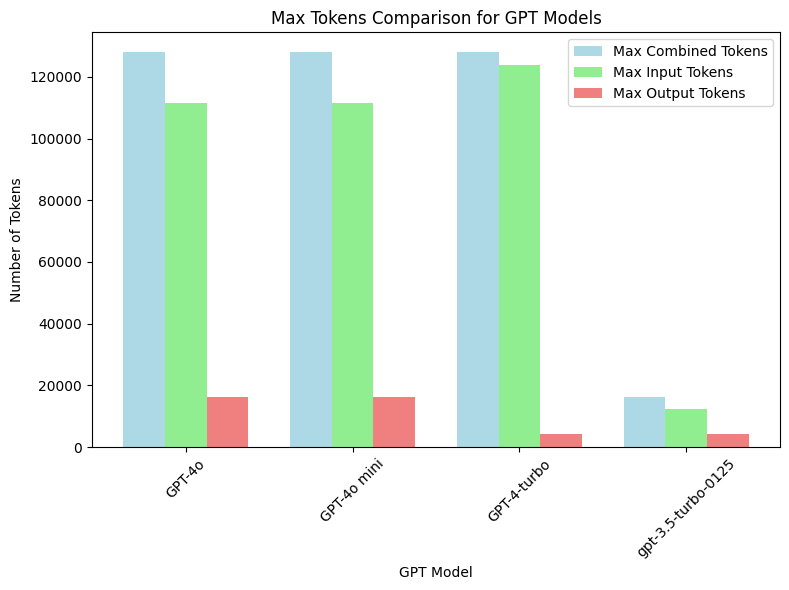

In [4]:
plt.figure(figsize=(8, 6))
bar_width = 0.25
index = range(len(df["Model"]))
plt.bar(index, df["Max_Combined_Tokens"], bar_width, label='Max Combined Tokens', color='lightblue')
plt.bar([i + bar_width for i in index], df["Max_Input_Tokens"], bar_width, label='Max Input Tokens', color='lightgreen')
plt.bar([i + 2 * bar_width for i in index], df["Max_Output_Tokens"], bar_width, label='Max Output Tokens', color='lightcoral')
plt.xlabel('GPT Model')
plt.ylabel('Number of Tokens')
plt.title('Max Tokens Comparison for GPT Models')
plt.xticks([i + bar_width for i in index], df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## **Cost Calculation**

In [5]:
# estimated average input and output token count
input_tokens = 450  # based on test inputs
output_tokens = 100  # estimate

# estimate costs per duplicate check call
input_costs = [(price / 1000) * input_tokens 
               for price in data["Price_1k_Tokens_Input"]]
output_costs = [(price / 1000) * output_tokens 
                for price in data["Price_1k_Tokens_Output"]]
total_costs = [input_cost + output_cost 
               for input_cost, output_cost in zip(input_costs, output_costs)]

In [6]:
cost_data = {
    "Model": data["Model"],
    "Input Cost (USD)": input_costs,
    "Output Cost (USD)": output_costs,
    "Total Cost (USD)": total_costs
}

cost_df = pd.DataFrame(cost_data)
print("\nCost Per API Call/Duplicate Check\n")
print(cost_df, "\n")


Cost Per API Call/Duplicate Check

                Model  Input Cost (USD)  Output Cost (USD)  Total Cost (USD)
0              GPT-4o          0.001125            0.00100          0.002125
1         GPT-4o mini          0.000068            0.00006          0.000128
2         GPT-4-turbo          0.004500            0.00300          0.007500
3  gpt-3.5-turbo-0125          0.000225            0.00015          0.000375 



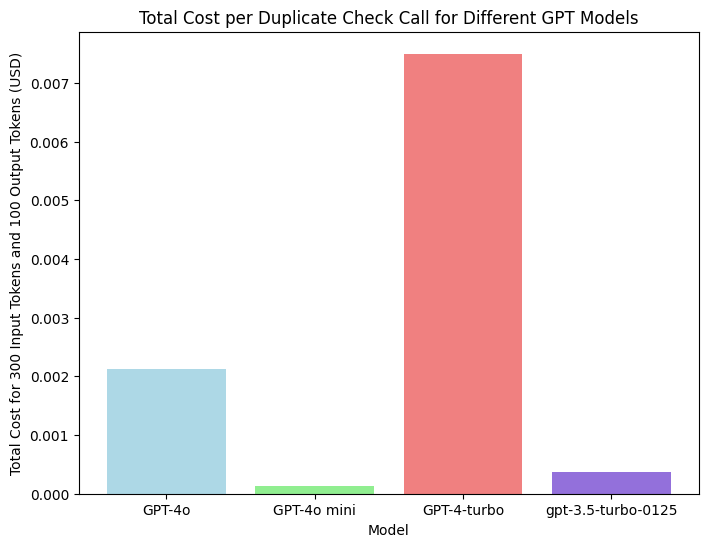

In [7]:
models = data["Model"]
values = total_costs

plt.figure(figsize=(8, 6))
plt.bar(models, values, color=['lightblue', 'lightgreen', 'lightcoral', '#9370DB'])
plt.xlabel('Model')
plt.ylabel('Total Cost for 300 Input Tokens and 100 Output Tokens (USD)')
plt.title('Total Cost per Duplicate Check Call for Different GPT Models')
print("\n")
plt.show()

#### **Usage Tiers**

they have different rate limits on requests per min (RPM), requests per day (RPD), and tokens per min (TDP)
> https://platform.openai.com/docs/guides/rate-limits/usage-tiers

i think all users start on Tier 1 and they move you to the next tier automatically when the usage and spending on API goes up

In [8]:
tier_data = {
    "Tier": ["Tier 1", "Tier 2", "Tier 3", "Tier 4", "Tier 5"],
    "Qualification": [
        "$5 paid",
        "$50 paid and 7+ days since first payment",
        "$100 paid and 7+ days since first payment",
        "$250 paid and 14+ days since first payment",
        "$1,000 paid and 30+ days since first payment",
    ],
    "Usage limits": ["$100 per month", "$500 per month"
        , "$1,000 per month", "$5,000 per month", 
        "$200,000 per month"]
}

tier_df = pd.DataFrame(tier_data)
print("\n", tier_df)


      Tier                                 Qualification        Usage limits
0  Tier 1                                       $5 paid      $100 per month
1  Tier 2      $50 paid and 7+ days since first payment      $500 per month
2  Tier 3     $100 paid and 7+ days since first payment    $1,000 per month
3  Tier 4    $250 paid and 14+ days since first payment    $5,000 per month
4  Tier 5  $1,000 paid and 30+ days since first payment  $200,000 per month


In [9]:
tier_1_data = {
    "Model": ["gpt-4o", "gpt-4o-mini", "gpt-4-turbo", "gpt-3.5-turbo"],
    "Requests Per Min": [500, 500, 500, 3500],
    "Requests Per Day": ["-", 10000, "-", 10000],
    "Tokens Per Min": [30000, 200000, 30000, 200000],
}
tier_2_data = {
    "Model": ["gpt-4o", "gpt-4o-mini", "gpt-4-turbo", "gpt-3.5-turbo"],
    "Requests Per Min": [5000, 5000, 5000, 3500],
    "Tokens Per Min": [450000, 2000000, 450000, 2000000],
}
tier_3_data = {
    "Model": ["gpt-4o", "gpt-4o-mini", "gpt-4-turbo", "gpt-3.5-turbo"],
    "Requests Per Min": [5000, 5000, 5000, 3500],
    "Tokens Per Min": [800000, 4000000, 600000, 4000000],
}
tier_4_data = {
    "Model": ["gpt-4o", "gpt-4o-mini", "gpt-4-turbo", "gpt-3.5-turbo"],
    "Requests Per Min": [10000, 10000, 10000, 10000],
    "Tokens Per Min": [2000000, 10000000, 800000, 10000000],
}
tier_5_data = {
    "Model": ["gpt-4o", "gpt-4o-mini", "gpt-4-turbo", "gpt-3.5-turbo"],
    "Requests Per Min": [10000, 30000, 10000, 10000],
    "Tokens Per Min": [30000000, 150000000, 2000000, 50000000],
}


tier_1_df = pd.DataFrame(tier_1_data)
print("\nTier 1 Rate Limits\n")
print(tier_1_df)
tier_2_df = pd.DataFrame(tier_2_data)
print("\nTier 2 Rate Limits\n")
print(tier_2_df)
tier_3_df = pd.DataFrame(tier_3_data)
print("\nTier 3 Rate Limits\n")
print(tier_3_df)


Tier 1 Rate Limits

           Model  Requests Per Min Requests Per Day  Tokens Per Min
0         gpt-4o               500                -           30000
1    gpt-4o-mini               500            10000          200000
2    gpt-4-turbo               500                -           30000
3  gpt-3.5-turbo              3500            10000          200000

Tier 2 Rate Limits

           Model  Requests Per Min  Tokens Per Min
0         gpt-4o              5000          450000
1    gpt-4o-mini              5000         2000000
2    gpt-4-turbo              5000          450000
3  gpt-3.5-turbo              3500         2000000

Tier 3 Rate Limits

           Model  Requests Per Min  Tokens Per Min
0         gpt-4o              5000          800000
1    gpt-4o-mini              5000         4000000
2    gpt-4-turbo              5000          600000
3  gpt-3.5-turbo              3500         4000000


In [10]:
tier_4_df = pd.DataFrame(tier_4_data)
print("\nTier 4 Rate Limits\n")
print(tier_4_df)
tier_5_df = pd.DataFrame(tier_5_data)
print("\nTier 5 Rate Limits\n")
print(tier_5_df)


Tier 4 Rate Limits

           Model  Requests Per Min  Tokens Per Min
0         gpt-4o             10000         2000000
1    gpt-4o-mini             10000        10000000
2    gpt-4-turbo             10000          800000
3  gpt-3.5-turbo             10000        10000000

Tier 5 Rate Limits

           Model  Requests Per Min  Tokens Per Min
0         gpt-4o             10000        30000000
1    gpt-4o-mini             30000       150000000
2    gpt-4-turbo             10000         2000000
3  gpt-3.5-turbo             10000        50000000


In [11]:
# calculate for number of calls
calls = list(range(0, 10001))

# total costs for each model based on the number of calls
total_costs_per_model = {
    model: [total_cost * call for call in calls]
    for model, total_cost in zip(models, total_costs)
}

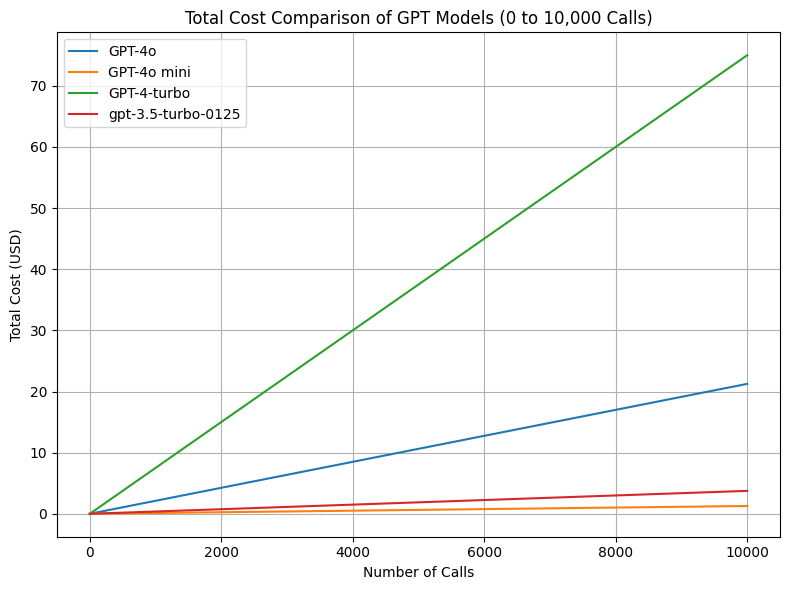

In [12]:
plt.figure(figsize=(8, 6))

for model, costs in total_costs_per_model.items():
    plt.plot(calls, costs, label=model)

plt.xlabel('Number of Calls')
plt.ylabel('Total Cost (USD)')
plt.title('Total Cost Comparison of GPT Models (0 to 10,000 Calls)')
plt.legend()
plt.grid(True)
plt.tight_layout()
print("\n")
plt.show()

In [13]:
# table to show the cost of every 500 calls from 0 to 10000
call_intervals = list(range(0, 10001, 500))

costs_at_intervals = {
    "Calls": call_intervals
}

for model in models:
    costs_at_intervals[model] = [total_costs_per_model[model][i] 
                                 for i in call_intervals]

costs_at_intervals_df = pd.DataFrame(costs_at_intervals)

print("\nCost of API Calls from 0 to 10,000\n")
print(costs_at_intervals_df)


Cost of API Calls from 0 to 10,000

    Calls   GPT-4o  GPT-4o mini  GPT-4-turbo  gpt-3.5-turbo-0125
0       0   0.0000      0.00000         0.00              0.0000
1     500   1.0625      0.06375         3.75              0.1875
2    1000   2.1250      0.12750         7.50              0.3750
3    1500   3.1875      0.19125        11.25              0.5625
4    2000   4.2500      0.25500        15.00              0.7500
5    2500   5.3125      0.31875        18.75              0.9375
6    3000   6.3750      0.38250        22.50              1.1250
7    3500   7.4375      0.44625        26.25              1.3125
8    4000   8.5000      0.51000        30.00              1.5000
9    4500   9.5625      0.57375        33.75              1.6875
10   5000  10.6250      0.63750        37.50              1.8750
11   5500  11.6875      0.70125        41.25              2.0625
12   6000  12.7500      0.76500        45.00              2.2500
13   6500  13.8125      0.82875        48.75         